Many of the ideas in this tutorial are simplified versions of what is discussed in 

```
    Priebe, C. E., Park, Y., Vogelstein, J. T., Conroy, J. M., Lyzinski, V., Tang, M., ... & Bridgeford, E. (2019). On a two-truths phenomenon in spectral graph clustering. Proceedings of the National Academy of Sciences, 116(13), 5995-6000.
```

Create an affinity network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


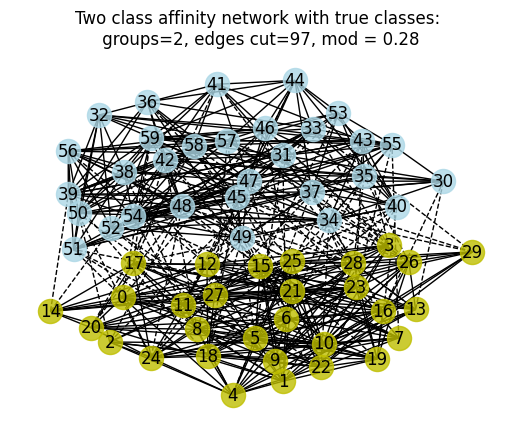

In [570]:
##############
### Cell 1 ###
##############

## REQUIRES pip install scikit-learn

from drawing_utilities import show_dendrogram
from drawing_utilities import show_partitions
from drawing_utilities import show_kCores
from drawing_utilities import show_kCores_by_partition
from drawing_utilities import show_2D_scatterplot
from partitioning_utilities import get_k_fiedler_eigenvectors_sparse
from partitioning_utilities import get_k_leading_eigenvectors_sparse
from partitioning_utilities import get_colors_from_clusters
import networkx as nx

%load_ext autoreload

a = 0.4
b = 0.1
c = 0.4
num_nodes: int = 30
G: nx.Graph = nx.stochastic_block_model([num_nodes,num_nodes],[[a, b],[b,c]])

partition_dict: dict[int, set[int]] = {0: set(), 1: set()}
for node in G.nodes():
    if node < num_nodes:
        partition_dict[0].add(node)
    else:
        partition_dict[1].add(node)
partition: list[set[int]] = list(partition_dict.values())

show_partitions(G, partition, title="Two class affinity network with true classes:\n")

Look at dendrogram

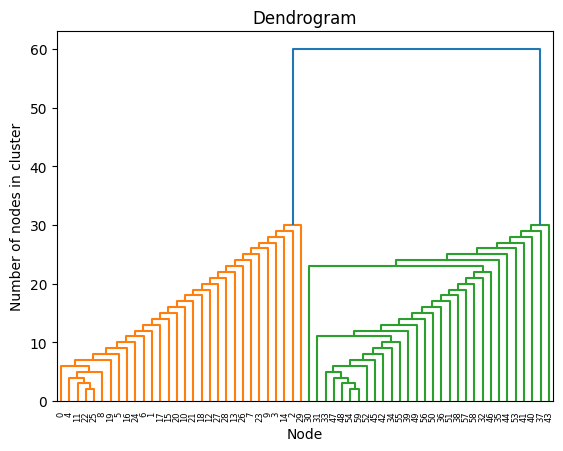

In [571]:
##############
### Cell 2 ###
##############
import networkx as nx
from copy import deepcopy
def largest_component(graph):
    # Find all connected components
    H = deepcopy(graph)
    components = nx.connected_components(H)
    # Get the largest component
    largest = max(components, key=len)
    H = deepcopy(H.subgraph(largest))
    mapping = {old_label: new_label for new_label, old_label in enumerate(G.nodes())}
    H = nx.relabel_nodes(H, mapping)
    return H

H = largest_component(G)
show_dendrogram(H)

Look at kcores

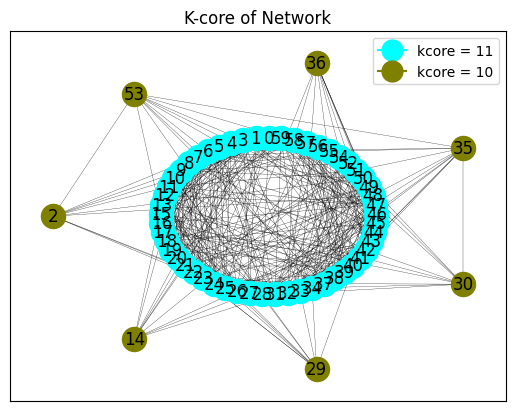

In [572]:
##############
### Cell 3 ###
##############
show_kCores(G)

Get first and second fiedler vector

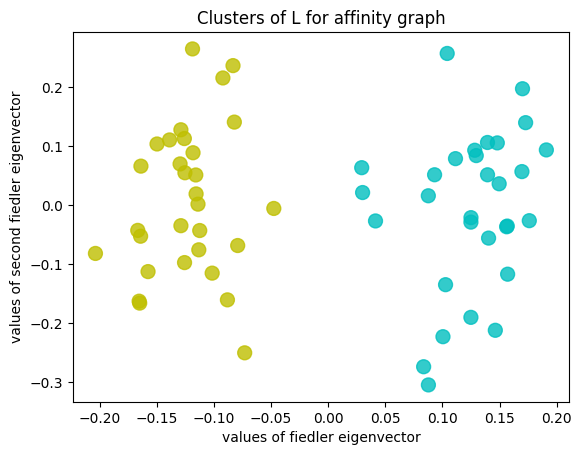

In [573]:
##############
### Cell 4 ###
##############

%autoreload 2

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=2)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for affinity graph")


Show graph partitioned into two clusters using the Laplacian embedding

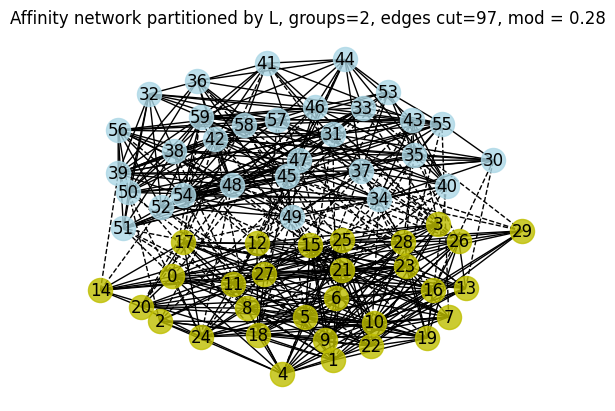

In [574]:
##############
### Cell 5 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by L")

Repeat but partition using adjacency matrix

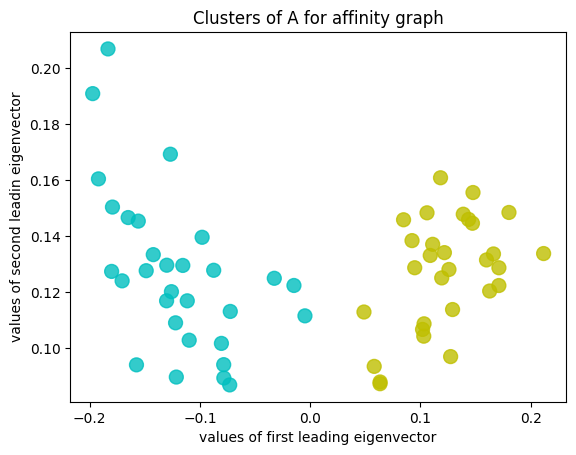

In [575]:
##############
### Cell 6 ###
##############
A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=2)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for affinity graph")


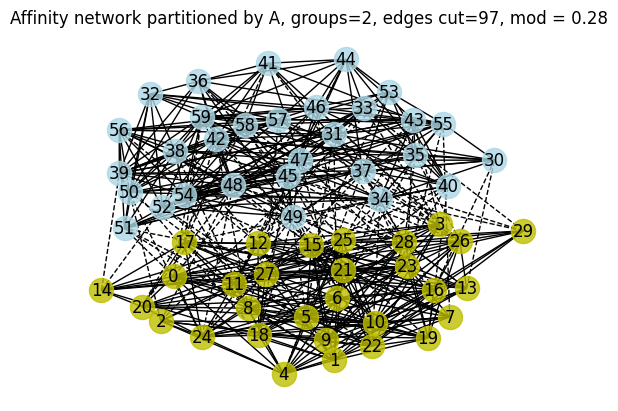

In [576]:
##############
### Cell 7 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by A")

Redraw to see which node classes belong n core and which belong in the periphery

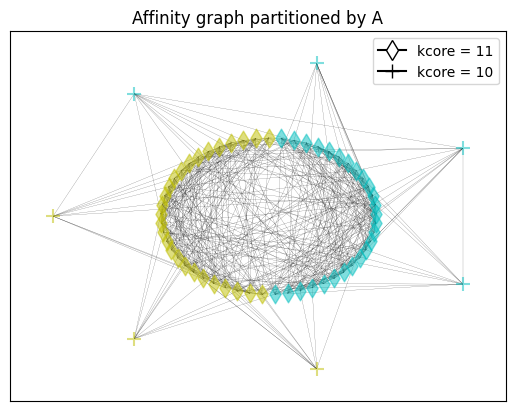

In [577]:
##############
### Cell 8 ###
##############

show_kCores_by_partition(G, colors, title="Affinity graph partitioned by A")

---

Create a core-periphery network

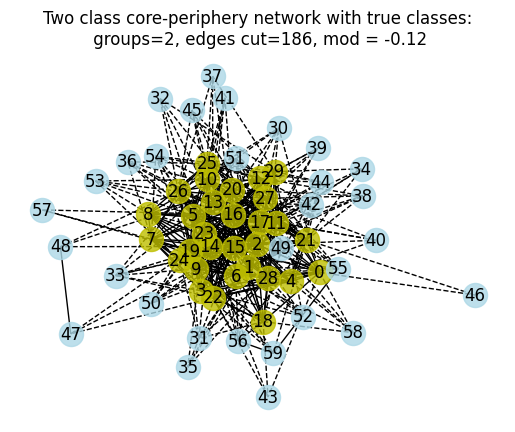

In [578]:
##############
### Cell 9 ###
##############

a = 0.4
b = 0.2
c = 0.01
G: nx.Graph = nx.stochastic_block_model([num_nodes,num_nodes],[[a,b],[b,c]])

partition_dict: dict[int, set[int]] = {0: set(), 1: set()}
for node in G.nodes():
    if node < num_nodes:
        partition_dict[0].add(node)
    else:
        partition_dict[1].add(node)
partition: list[set[int]] = list(partition_dict.values())

show_partitions(G, 
                pos = nx.spring_layout(G),
                partition = partition, 
                title="Two class core-periphery network with true classes:\n")



Look at dendrogram

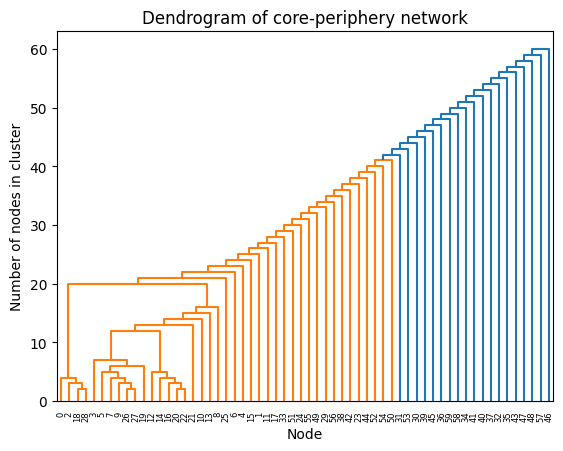

In [579]:
###############
### Cell 10 ###
###############

#G = largest_component(G)
show_dendrogram(G,title="Dendrogram of core-periphery network")

Look at kcores

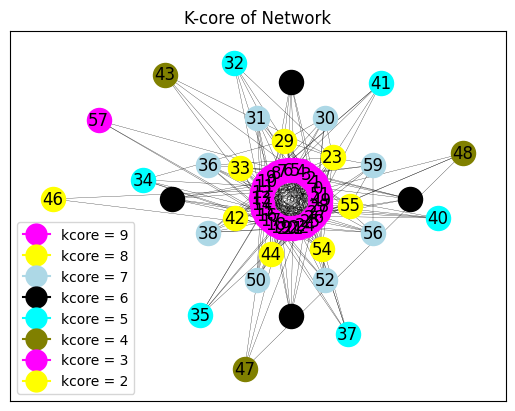

In [580]:
###############
### Cell 11 ###
###############

show_kCores(G)

Let's partition using the normalized Laplacian matrix

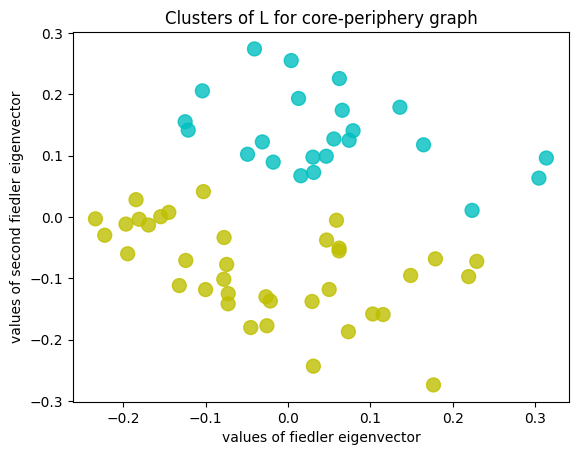

In [581]:
###############
### Cell 12 ###
###############

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=2)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for core-periphery graph")

Show partition

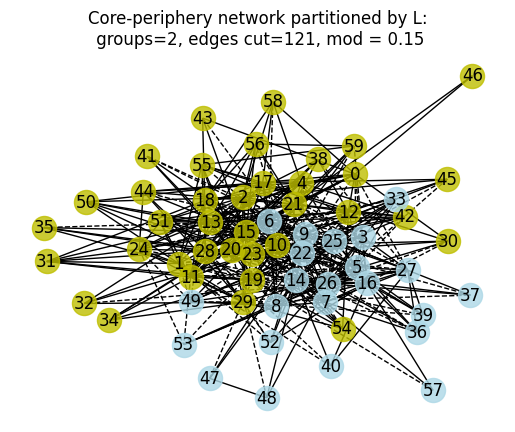

In [582]:
###############
### Cell 13 ###
###############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}


# Spring layout tends to show core periphery structure well
show_partitions(G, 
                pos = nx.spring_layout(G),
                partition=(group1, group2), 
                title="Core-periphery network partitioned by L:\n")

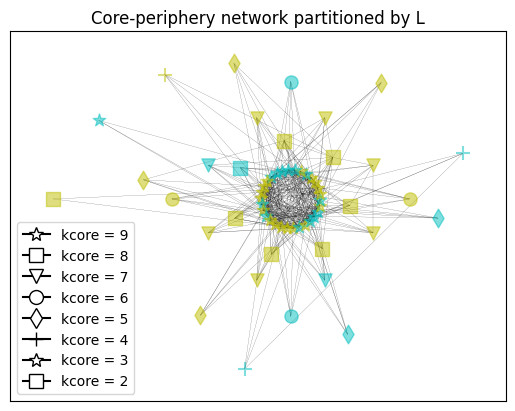

In [583]:
###############
### Cell 14 ###
###############
show_kCores_by_partition(G,colors,title = "Core-periphery network partitioned by L")

Repeat using the adjacency matrix

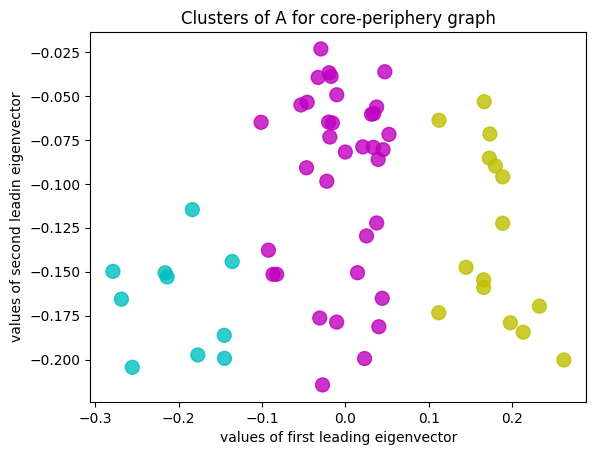

In [584]:
###############
### Cell 15 ##
###############

A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=3)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for core-periphery graph")

Show partition by adjacency matrix

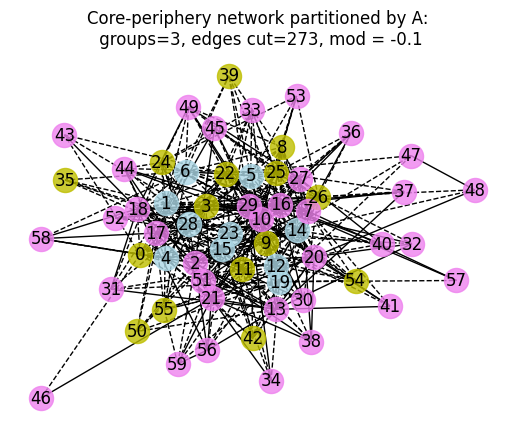

In [585]:
###############
### Cell 16 ###
###############

group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}
group3 = {node for node in G.nodes() if colors[node] == 'm'}
#group4 = {node for node in G.nodes() if colors[node] == 'k'}


# Spring layout tends to show core periphery structure well
show_partitions(G, 
                pos = nx.spring_layout(G),
                partition=(group1, group2,group3), 
                title="Core-periphery network partitioned by A:\n")

Redraw using the shell layout to see which class falls in core and which in periphery

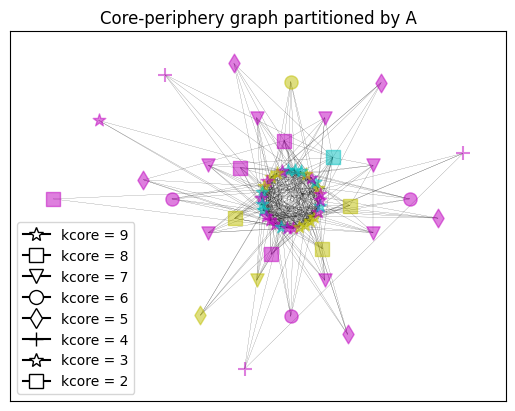

In [586]:
###############
### Cell 17 ###
###############
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")

It looks like many of the nodes of similar colors are in the 3-core, which suggests that the clustering by the eigenvectors of the adjacency matrix pull out at least some information about the k-core structure. This result isn't consistent and depends on a lot of random things.

---

### Where Will Adjacency Matrix Sprectral Clustering Work?

The reason to believe that spectral clustering will work on eigenvectors of the adjacency matrix is that some graphs have nodes that have very similar centrality values. The reason to believe this kind of spectral clustering will work for core-periphery networks is because nodes in the core should have similar centrality values and nodes in the periphery should also have similar eigenvector centrality scores. Let's illustrate this with the graph used in class. 

In [587]:
###############
### Cell 18 ###
###############

pinwheel_graph: nx.Graph = nx.Graph()
pinwheel_graph.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
pinwheel_graph.add_edges_from([(0,1), (0,2), (1,2),
                                (3,4), (3,5), (4,5),
                                (6,7), (6,8), (7,8),
                                (9,0), (9,3), (9,6)])


Partition using the spectrum of the Laplacian matrix

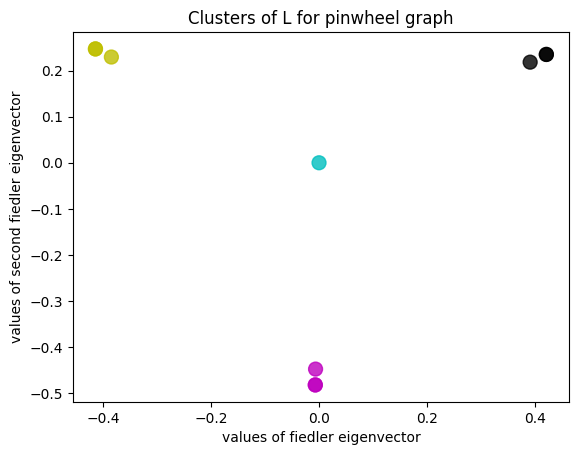

In [588]:
###############
### Cell 19 ###
###############

L = nx.linalg.normalized_laplacian_matrix(pinwheel_graph)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=4)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for pinwheel graph")

Show partition from the classes discovered when we cluster the values of the fiedler eigenvectors.

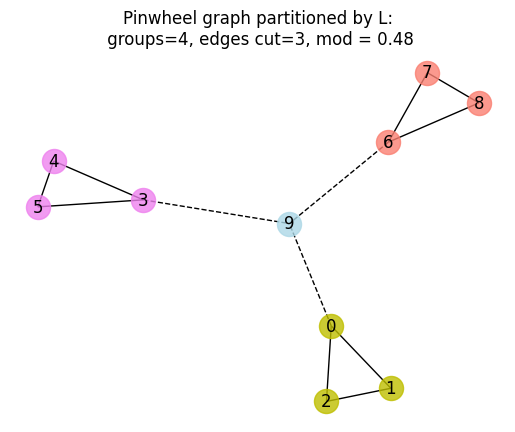

In [589]:
###############
### Cell 20 ###
###############
group1 = {node for node in pinwheel_graph.nodes() if colors[node] == 'y'}
group2 = {node for node in pinwheel_graph.nodes() if colors[node] == 'c'}
group3 = {node for node in pinwheel_graph.nodes() if colors[node] == 'm'}
group4 = {node for node in pinwheel_graph.nodes() if colors[node] == 'k'}


# Spring layout tends to show core periphery structure well
show_partitions(pinwheel_graph, 
                pos = nx.spring_layout(pinwheel_graph),
                partition=(group1, group2, group3, group4), 
                title="Pinwheel graph partitioned by L:\n")

Let's see what happens when we cluster using the spectra of the adjacency matrix.

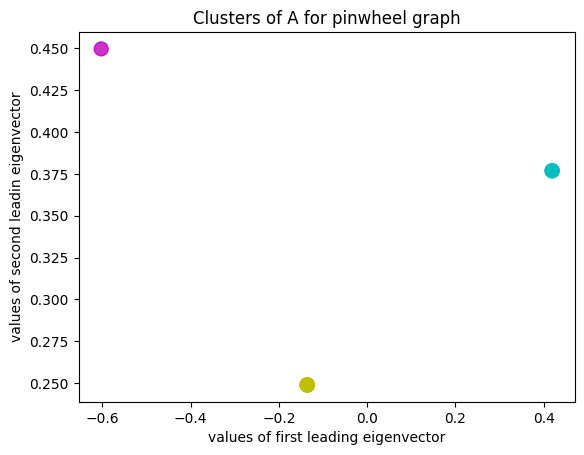

In [590]:
###############
### Cell 21 ##
###############

A = nx.linalg.adjacency_matrix(pinwheel_graph)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=3)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for pinwheel graph")

And show which nodes are in each partition

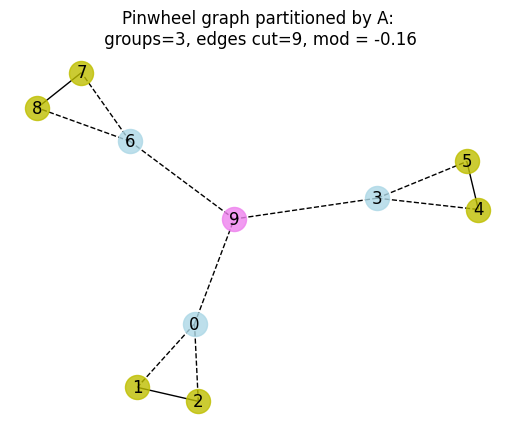

In [591]:
###############
### Cell 22 ###
###############
group1 = {node for node in pinwheel_graph.nodes() if colors[node] == 'y'}
group2 = {node for node in pinwheel_graph.nodes() if colors[node] == 'c'}
group3 = {node for node in pinwheel_graph.nodes() if colors[node] == 'm'}
#group4 = {node for node in pinwheel_graph.nodes() if colors[node] == 'k'}
#group5 = {node for node in pinwheel_graph.nodes() if colors[node] == 'red'}


# Spring layout tends to show core periphery structure well
show_partitions(pinwheel_graph, 
                pos = nx.spring_layout(pinwheel_graph),
                partition=(group1, group2, group3), 
                title="Pinwheel graph partitioned by A:\n")

Notice how the nodes are clustered by their centrality scores. In other words, the nodes are clustered by the "structured role" that the nodes play in their local networks. We'll formalize the idea of "structured role" in a later lecture.

---

#### Core-periphery Network With Strong Structure
Let's construct a core-periphery graph with a lot more structure and see if the "two-ways" hypothesis works better for that network.

In [592]:
###############
### Cell 23 ###
###############

G: nx.Graph = nx.complete_graph(6)
G.add_nodes_from(list(range(6,30)))
G.add_edges_from([(0,6), (0,7), (6,7),
                  (1,8), (1,9), (8,9),
                  (2,10), (2,11), (10,11),
                  (3,12), (3,13), (12,13),
                  (4,14), (4,15), (14,15),
                  (5,16), (5,17), (16,17),
                  (6,18), (7,19), (8,20), (9,21),
                  (10,22), (11,23), (12,24), (13,25),
                  (14,26), (15,27), (16,28), (17,29)])

Partition using spectrum of the Laplacian matrix

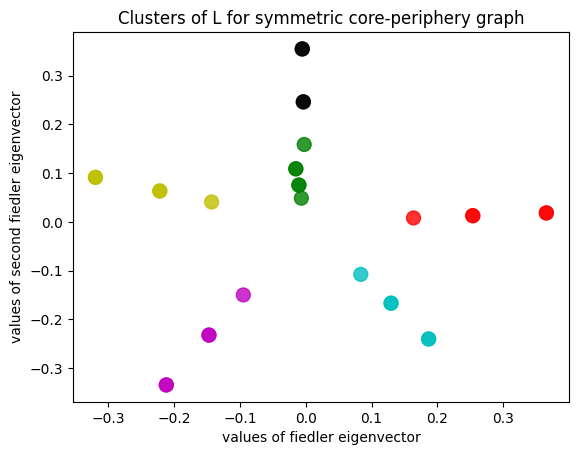

In [593]:
###############
### Cell 24 ###
###############
# Fix the random seed so that we get consistent results
# The eigenvalue solver used has a stochastic element
import numpy as np
np.random.seed(42)

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=6)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for symmetric core-periphery graph")

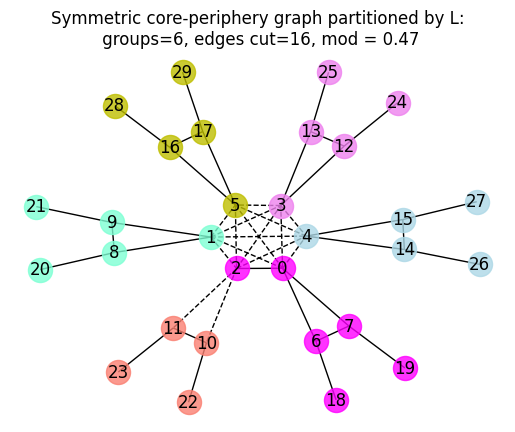

In [594]:
###############
### Cell 25 ###
###############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}
group3 = {node for node in G.nodes() if colors[node] == 'm'}
group4 = {node for node in G.nodes() if colors[node] == 'k'}
group5 = {node for node in G.nodes() if colors[node] == 'red'}
group6 = {node for node in G.nodes() if colors[node] == 'green'}


# Spring layout tends to show core periphery structure well
show_partitions(G, 
                pos = nx.spring_layout(G),
                partition=(group1, group2, group3, group4, group5, group6), 
                title="Symmetric core-periphery graph partitioned by L:\n")

Partition using the spectra of the adjacency matrix

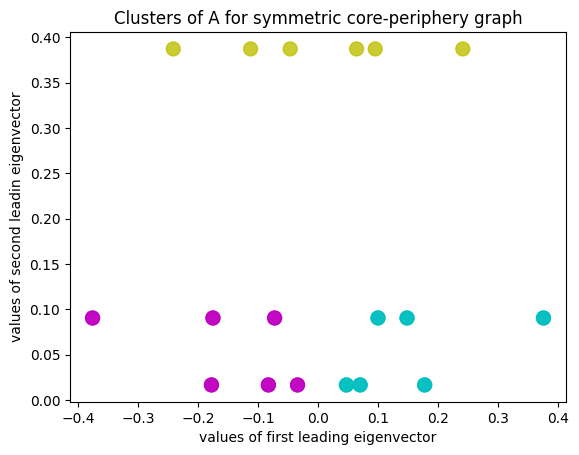

In [607]:
###############
### Cell 26 ##
###############
np.random.seed(42)

A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=3)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for symmetric core-periphery graph")

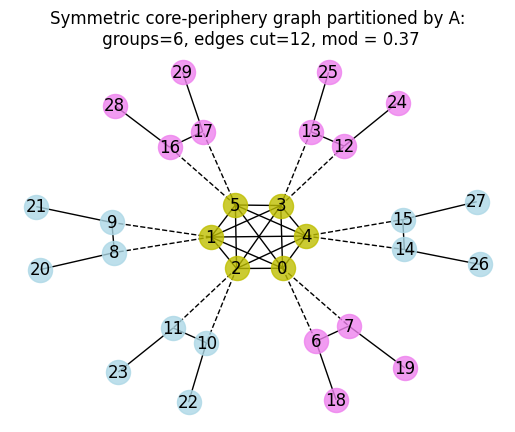

In [608]:
###############
### Cell 27 ###
###############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}
group3 = {node for node in G.nodes() if colors[node] == 'm'}
group4 = {node for node in G.nodes() if colors[node] == 'k'}
group5 = {node for node in G.nodes() if colors[node] == 'red'}
group6 = {node for node in G.nodes() if colors[node] == 'green'}


# Spring layout tends to show core periphery structure well
show_partitions(G, 
                pos = nx.spring_layout(G),
                partition=(group1, group2, group3, group4, group5, group6), 
                title="Symmetric core-periphery graph partitioned by A:\n")

Notice that eigenvalues are not unique for this adjacency matrix. Choosing just two eigenvectors won't do a good job.

In [609]:
A = nx.linalg.adjacency_matrix(G)
B = A.toarray()
eigenvalues, eigenvectors = np.linalg.eig(B)
print(sorted([float(np.round(ev, 2)) for ev in eigenvalues], reverse=True))

[5.47, 2.11, 2.11, 2.11, 2.11, 2.11, 1.26, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, -0.25, -0.25, -0.25, -0.25, -0.25, -0.73, -1.62, -1.62, -1.62, -1.62, -1.62, -1.62, -1.86, -1.86, -1.86, -1.86, -1.86]


--- 

### Clustering Using More Information

The scatter plot won't work well since we are using more than 2 eigenvectors

In [610]:
num_eigenvectors: int = 6
A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, num_eigenvectors)
colors = get_colors_from_clusters(leading_vectors, num_clusters=3)

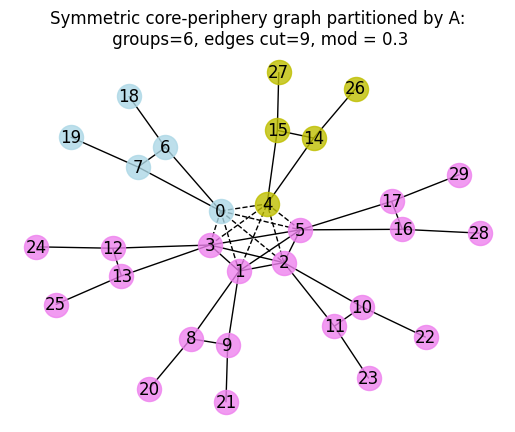

In [611]:
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}
group3 = {node for node in G.nodes() if colors[node] == 'm'}
group4 = {node for node in G.nodes() if colors[node] == 'k'}
group5 = {node for node in G.nodes() if colors[node] == 'red'}
group6 = {node for node in G.nodes() if colors[node] == 'green'}


# Spring layout tends to show core periphery structure well
show_partitions(G, 
                pos = nx.spring_layout(G),
                partition=(group1, group2, group3, group4, group5, group6), 
                title="Symmetric core-periphery graph partitioned by A:\n")

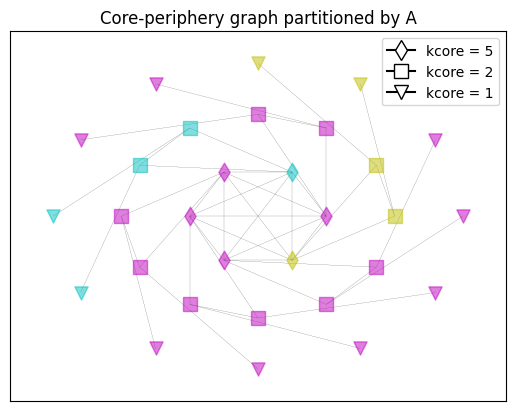

In [612]:
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")

I see nothing useful in this plot